In [ ]:
!pip install lime
!pip install seaborn
!pip install lifelines

Sex values as string: Male      5819
Female    1395
Name: sex, dtype: int64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


SEX VALUES AS BINARY: 0    5819
1    1395
Name: sex, dtype: int64
CHARGE VALUES AS STRING:  F    4666
M    2548
Name: c_charge_degree, dtype: int64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


CHARGE VALUES AS BINARY:  1    4666
0    2548
Name: c_charge_degree, dtype: int64
Null values:  False Sum:  sex                0
age                0
juv_fel_count      0
juv_misd_count     0
priors_count       0
c_charge_degree    0
dtype: int64
Index(['sex', 'age', 'juv_fel_count', 'juv_misd_count', 'priors_count',
       'c_charge_degree'],
      dtype='object')
[]
prisoner information:
 [0 27 0 0 0 1] 1

Support vector machine accuracy:  61.82 
prediction:  [0] 
Predict probability:  [[0.52129741 0.47870259]] 
Confusion Matrix:
 [[0.33610534 0.18641719]
 [0.1954262  0.28205128]]
Support Vector Machine: 



/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:234: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:195: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Intercept 0.6007197465317047
Prediction_local [0.43169593]
Right: 0.47870258627776435


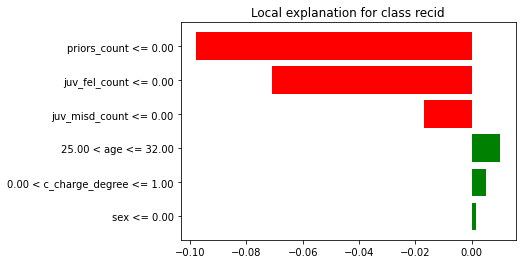

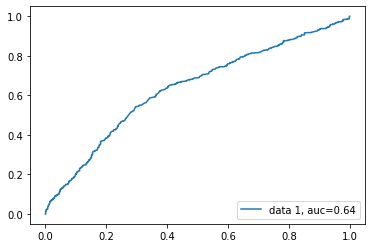

Mean validation accuracy/loss:  nan stddev:  nan Confidence Interval:  nan


In [ ]:
from __future__ import print_function
import pandas as pd
import numpy as np
import lime
import lime.lime_tabular
import sklearn.ensemble
import sklearn.metrics
from lime import lime_text
from lime.lime_text import LimeTextExplainer
import sklearn
from sklearn.pipeline import make_pipeline
from sklearn import linear_model
import matplotlib.pyplot as plt
from sklearn import preprocessing
import sklearn.feature_extraction 
import seaborn as sns
import pickle
import datetime
from datetime import timedelta
import scipy.stats as st
from sklearn import metrics
from sklearn import svm
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

compas = pd.read_csv("compas-scores-two-years.csv")

predict = 'is_recid'
total = len(compas)
#Encode sex values
print("Sex values as string:", compas['sex'].value_counts())
for i in range(total):
  if compas['sex'][i] == 'Male':
    compas['sex'][i] = 0
  if compas['sex'][i] == 'Female':
    compas['sex'][i] = 1
print("SEX VALUES AS BINARY:",compas['sex'].value_counts())
#Encode charge degree values
print("CHARGE VALUES AS STRING: ", compas['c_charge_degree'].value_counts())
for i in range(total):
  if compas['c_charge_degree'][i] == 'M':
    compas['c_charge_degree'][i] = 0
  if compas['c_charge_degree'][i] == 'F':
    compas['c_charge_degree'][i] = 1
print("CHARGE VALUES AS BINARY: ", compas['c_charge_degree'].value_counts())


compasfeat = compas.drop(['id', 'name', 'first', 'last','race','decile_score', 'juv_other_count','v_decile_score','compas_screening_date','dob', 'age_cat',  'days_b_screening_arrest', 'c_jail_in','c_jail_out',
                        'c_case_number', 'c_offense_date', 'c_arrest_date', 'c_days_from_compas','c_charge_desc', 'r_case_number','r_charge_degree','is_recid',
                        'r_days_from_arrest', 'r_offense_date','r_charge_desc', 'r_jail_in','r_jail_out','is_violent_recid','two_year_recid', 'priors_count.1',
                        'decile_score.1','vr_case_number','vr_charge_degree', 'vr_offense_date', 'vr_charge_desc','type_of_assessment','score_text', 
                        'screening_date', 'v_type_of_assessment', 'v_score_text', 'v_screening_date', 'violent_recid', 'in_custody','out_custody','start','end','event' ], axis=1)

print("Null values: ", compasfeat.isnull().values.any(), "Sum: ", compasfeat.isnull().sum())

x = np.array(compasfeat)
y = np.array(compas[predict])

epochs = 1000

print(compasfeat.columns)
svmaccuracies= []
"""for _ in range(epochs):
    x_train3, x_test3, y_train3, y_test3 = sklearn.model_selection.train_test_split(x, y, test_size=.20)
    clf= svm.NuSVC(gamma='auto', probability=True)
    clf.fit(x_train3, y_train3)
    svmacc =clf.score(x_test3, y_test3)
    svmacc = round(svmacc*100, 2)
    svmaccuracies.append(svmacc)

DresselSVM = 'DresselSVM.sav'
pickle.dump(clf, open(DresselSVM, 'wb'))
"""
#open saved model
openoriginalSVM = pickle.load(open("DresselSVM.sav", "rb"))
#results

print(svmaccuracies)
svmmeans = np.mean(svmaccuracies, 0)
svmstds = np.std(svmaccuracies, 0)
svmci95 = 1.96*svmstds/np.sqrt(epochs)

i = 66

print("prisoner information:\n", x_test3[i],y_test3[i])
#SVM confusion matrix

svm_matrix = confusion_matrix(y_test3, clf.predict(x_test3), normalize='all')
explainer3 = lime.lime_tabular.LimeTabularExplainer(x_test3, mode='classification', feature_names = compasfeat.columns.values, class_names=['no recid', 'recid'], verbose=True, discretize_continuous=True, discretizer='quartile')

print("\nSupport vector machine accuracy: ", svmacc, "\nprediction: ", clf.predict(x_test3[i].reshape(1, -1)), "\nPredict probability: ", clf.predict_proba(x_test3[i].reshape(1, -1)), "\nConfusion Matrix:\n", svm_matrix)

print("Support Vector Machine: \n")
svmexp = explainer3.explain_instance(x_test3[i], clf.predict_proba, num_features=len(compasfeat.columns))
#svmexp.show_in_notebook(show_table=True)
svmimg = svmexp.as_pyplot_figure()
svmimg.savefig('DresselSVMexp', format='pdf',bbox_inches='tight')
plt.show()


y_pred_proba = clf.predict_proba(x_test3)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test3,  y_pred_proba)
auc = round(metrics.roc_auc_score(y_test3, y_pred_proba),2)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.savefig('originalsvmAUC.pdf', format='pdf',bbox_inches='tight')
plt.show()

print("Mean validation accuracy/loss: ", svmmeans, "stddev: ", svmstds, "Confidence Interval: ",svmci95)